<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#상관관계-확인" data-toc-modified-id="상관관계-확인-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>상관관계 확인</a></span></li><li><span><a href="#데이터-나누기" data-toc-modified-id="데이터-나누기-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>데이터 나누기</a></span><ul class="toc-item"><li><span><a href="#test1.-2015년-3월~2022년-6월" data-toc-modified-id="test1.-2015년-3월~2022년-6월-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>test1. 2015년 3월~2022년 6월</a></span><ul class="toc-item"><li><span><a href="#label-설정" data-toc-modified-id="label-설정-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>label 설정</a></span></li><li><span><a href="#corr-확인" data-toc-modified-id="corr-확인-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>corr 확인</a></span></li><li><span><a href="#null-제거" data-toc-modified-id="null-제거-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>null 제거</a></span></li><li><span><a href="#데이터-분할" data-toc-modified-id="데이터-분할-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>데이터 분할</a></span></li><li><span><a href="#DT" data-toc-modified-id="DT-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>DT</a></span></li><li><span><a href="#항목-변경" data-toc-modified-id="항목-변경-2.1.6"><span class="toc-item-num">2.1.6&nbsp;&nbsp;</span>항목 변경</a></span></li><li><span><a href="#올해-3월~6월에-대한-두산-data로-확인" data-toc-modified-id="올해-3월~6월에-대한-두산-data로-확인-2.1.7"><span class="toc-item-num">2.1.7&nbsp;&nbsp;</span>올해 3월~6월에 대한 두산 data로 확인</a></span></li></ul></li><li><span><a href="#test1.-2015년-3월~2022년-5월" data-toc-modified-id="test1.-2015년-3월~2022년-5월-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>test1. 2015년 3월~2022년 5월</a></span></li><li><span><a href="#data-변경" data-toc-modified-id="data-변경-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>data 변경</a></span><ul class="toc-item"><li><span><a href="#방법1.-pov-제외하고-확인" data-toc-modified-id="방법1.-pov-제외하고-확인-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>방법1. pov 제외하고 확인</a></span></li><li><span><a href="#방법2.-pov-포함해서-확인" data-toc-modified-id="방법2.-pov-포함해서-확인-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>방법2. pov 포함해서 확인</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import numpy as np
import pandas as pd

In [5]:
df_baseball=pd.read_csv("../project1/data_basball_0612.csv", encoding="euc-kr") #cp949 or euc-kr사용
df_baseball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591 entries, 0 to 590
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  591 non-null    int64  
 1   team        591 non-null    int64  
 2   year        591 non-null    int64  
 3   month       591 non-null    int64  
 4   pov         591 non-null    float64
 5   obp         544 non-null    float64
 6   slg         544 non-null    float64
 7   ba          544 non-null    float64
 8   ops         544 non-null    float64
 9   era         544 non-null    float64
 10  fb          544 non-null    float64
 11  inning      544 non-null    float64
 12  fb_inning   544 non-null    float64
 13  whip        544 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 64.8 KB


In [6]:
del(df_baseball['Unnamed: 0'])
df_baseball.head()

,team,year,month,pov,obp,slg,ba,ops,era,fb,inning,fb_inning,whip
0,1,2015,3,0.400,0.403,0.412,0.284,0.815,8.28,13.0,25.0,0.520,1.92
1,1,2015,4,0.318,0.290,0.295,0.208,0.584,5.52,129.0,195.2,0.661,1.79
2,1,2015,5,0.444,0.342,0.356,0.263,0.698,5.72,108.0,240.2,0.450,1.58
3,1,2015,6,0.435,0.353,0.456,0.290,0.810,5.93,85.0,202.0,0.421,1.68
4,1,2015,7,0.389,0.365,0.443,0.297,0.807,5.73,52.0,154.0,0.338,1.60


## 상관관계 확인

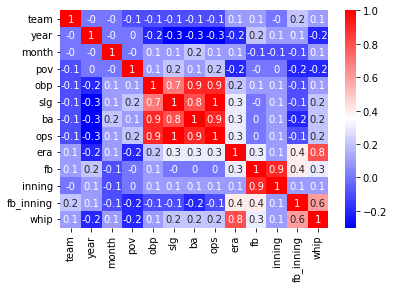

In [10]:
import seaborn as sns
correlation_matrix=df_baseball.corr().round(1)
sns.heatmap(data=correlation_matrix, annot=True, cmap='bwr');

## 데이터 나누기

### test1. 2015년 3월~2022년 6월

#### label 설정
- 년도별 순위별 평균 승률로 grade 나눔

In [15]:
df_avg=pd.read_csv("../project1/year_score.csv", encoding="utf8") #cp949 or euc-kr사용
df_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   년도      69 non-null     float64
 1   순위      70 non-null     int64  
 2   팀명      70 non-null     object 
 3   경기      70 non-null     int64  
 4   승       70 non-null     int64  
 5   패       70 non-null     int64  
 6   무       70 non-null     int64  
 7   승률      70 non-null     float64
 8   게임차     70 non-null     float64
 9   최근10경기  70 non-null     object 
 10  연속      70 non-null     object 
 11  홈       70 non-null     object 
 12  방문      70 non-null     object 
dtypes: float64(3), int64(5), object(5)
memory usage: 7.2+ KB


In [16]:
df_avg.head()

,년도,순위,팀명,경기,승,패,무,승률,게임차,최근10경기,연속,홈,방문
0,2015.0,1,두산,144,79,65,0,0.549,9.0,6승0무4패,2승,41-0-31,38-0-34
1,2016.0,1,두산,144,93,50,1,0.650,0.0,6승0무4패,2승,46-01-25,47-0-25
2,2017.0,1,KIA,144,87,56,1,0.608,0.0,6승0무4패,2승,45-0-27,42-01-29
3,2018.0,1,SK,144,78,65,1,0.545,14.5,3승0무7패,2패,42-0-30,36-1-35
4,2019.0,1,두산,144,88,55,1,0.615,0.0,8승1무1패,5승,47-0-25,41-01-30


In [22]:
df_avg[df_avg['순위']==1].mean()

C:\Users\ju-ye\AppData\Local\Temp\ipykernel_16512\4276048605.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_avg[df_avg['순위']==1].mean()


년도     2018.000000
순위        1.000000
경기      144.000000
승        83.428571
패        57.857143
무         2.714286
승률        0.590143
게임차       3.357143
dtype: float64

In [24]:
df_avg[df_avg['순위']==5].mean()

C:\Users\ju-ye\AppData\Local\Temp\ipykernel_16512\1833843571.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_avg[df_avg['순위']==5].mean()


년도     2018.000000
순위        5.000000
경기      144.000000
승        72.428571
패        69.571429
무         2.000000
승률        0.510000
게임차      14.714286
dtype: float64

- 평균 승률로 Grade 결정
    - Grade 1 = 0.59 이상
    - Grade 2 = 0.51 이상 0.59 미만
    - Grade 3 = 0.51 미만

In [25]:
df_baseball.head()

,team,year,month,pov,obp,slg,ba,ops,era,fb,inning,fb_inning,whip
0,1,2015,3,0.400,0.403,0.412,0.284,0.815,8.28,13.0,25.0,0.520,1.92
1,1,2015,4,0.318,0.290,0.295,0.208,0.584,5.52,129.0,195.2,0.661,1.79
2,1,2015,5,0.444,0.342,0.356,0.263,0.698,5.72,108.0,240.2,0.450,1.58
3,1,2015,6,0.435,0.353,0.456,0.290,0.810,5.93,85.0,202.0,0.421,1.68
4,1,2015,7,0.389,0.365,0.443,0.297,0.807,5.73,52.0,154.0,0.338,1.60


In [27]:
def get_grade(pov):
    if pov>=0.59:
        grade = 1
    elif pov>=0.51:
        grade = 2
    else:
        grade = 3
    return grade

In [29]:
df_baseball['grade'] = df_baseball['pov'].apply(lambda pov: get_grade(pov))
df_baseball

,team,year,month,pov,obp,slg,ba,ops,era,fb,inning,fb_inning,whip,grade
0,1,2015,3,0.400,0.403,0.412,0.284,0.815,8.28,13.0,25.0,0.520,1.92,3
1,1,2015,4,0.318,0.290,0.295,0.208,0.584,5.52,129.0,195.2,0.661,1.79,3
2,1,2015,5,0.444,0.342,0.356,0.263,0.698,5.72,108.0,240.2,0.450,1.58,3
3,1,2015,6,0.435,0.353,0.456,0.290,0.810,5.93,85.0,202.0,0.421,1.68,3
4,1,2015,7,0.389,0.365,0.443,0.297,0.807,5.73,52.0,154.0,0.338,1.60,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,10,2021,10,0.278,0.318,0.310,0.219,0.628,4.18,82.0,185.0,0.443,1.47,3
587,10,2022,3,0.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
588,10,2022,4,0.360,0.309,0.309,0.225,0.618,4.00,92.0,216.0,0.426,1.40,3
589,10,2022,5,0.577,0.318,0.387,0.251,0.705,6.51,96.0,228.0,0.421,1.67,2


In [30]:
df_baseball['grade'].unique()

array([3, 1, 2], dtype=int64)

#### corr 확인

In [37]:
df_baseball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591 entries, 0 to 590
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   team       591 non-null    int64  
 1   year       591 non-null    int64  
 2   month      591 non-null    int64  
 3   pov        591 non-null    float64
 4   obp        544 non-null    float64
 5   slg        544 non-null    float64
 6   ba         544 non-null    float64
 7   ops        544 non-null    float64
 8   era        544 non-null    float64
 9   fb         544 non-null    float64
 10  inning     544 non-null    float64
 11  fb_inning  544 non-null    float64
 12  whip       544 non-null    float64
 13  grade      591 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 64.8 KB


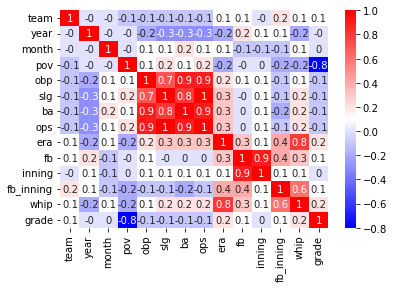

In [39]:
correlation_matrix=df_baseball.corr().round(1)
sns.heatmap(data=correlation_matrix, annot=True, cmap='bwr');

#### null 제거

In [38]:
df_baseball=df_baseball[df_baseball['obp'].notnull()]
df_baseball=df_baseball[df_baseball['slg'].notnull()]
df_baseball=df_baseball[df_baseball['ba'].notnull()]
df_baseball=df_baseball[df_baseball['ops'].notnull()]
df_baseball=df_baseball[df_baseball['era'].notnull()]
df_baseball=df_baseball[df_baseball['inning'].notnull()]
df_baseball=df_baseball[df_baseball['fb_inning'].notnull()]
df_baseball=df_baseball[df_baseball['whip'].notnull()]
df_baseball.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544 entries, 0 to 590
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   team       544 non-null    int64  
 1   year       544 non-null    int64  
 2   month      544 non-null    int64  
 3   pov        544 non-null    float64
 4   obp        544 non-null    float64
 5   slg        544 non-null    float64
 6   ba         544 non-null    float64
 7   ops        544 non-null    float64
 8   era        544 non-null    float64
 9   fb         544 non-null    float64
 10  inning     544 non-null    float64
 11  fb_inning  544 non-null    float64
 12  whip       544 non-null    float64
 13  grade      544 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 63.8 KB


#### 데이터 분할

In [40]:
from sklearn.model_selection import train_test_split

X=df_baseball[['pov','obp', 'slg', 'ba', 'ops', 'era', 'fb_inning', 'whip']]
y=df_baseball['grade']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)

#### DT

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt=DecisionTreeClassifier(max_depth=5, random_state=13)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=13)

In [48]:
pred=dt.predict(X_test)
print(accuracy_score(y_test, pred))

1.0


#### 항목 변경

- accuracy가 이상함
- pov 제외하고 다시 학습

In [49]:
df_baseball.head()

,team,year,month,pov,obp,slg,ba,ops,era,fb,inning,fb_inning,whip,grade
0,1,2015,3,0.400,0.403,0.412,0.284,0.815,8.28,13.0,25.0,0.520,1.92,3
1,1,2015,4,0.318,0.290,0.295,0.208,0.584,5.52,129.0,195.2,0.661,1.79,3
2,1,2015,5,0.444,0.342,0.356,0.263,0.698,5.72,108.0,240.2,0.450,1.58,3
3,1,2015,6,0.435,0.353,0.456,0.290,0.810,5.93,85.0,202.0,0.421,1.68,3
4,1,2015,7,0.389,0.365,0.443,0.297,0.807,5.73,52.0,154.0,0.338,1.60,3


In [50]:
X=df_baseball[['obp', 'slg', 'ba', 'ops', 'era', 'fb_inning', 'whip']]
y=df_baseball['grade']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)

dt=DecisionTreeClassifier(max_depth=5, random_state=13)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=13)

In [60]:
pred_test=dt.predict(X_test)
pred_train=dt.predict(X_train)
print(accuracy_score(y_test, pred_test)), print(accuracy_score(y_train, pred_train))

0.5137614678899083
0.6758620689655173


(None, None)

#### 올해 3월~6월에 대한 두산 data로 확인

In [61]:
import numpy as np
du=np.array([[0.483, 0.331, 0.357, 0.256, 4.12, 0.432, 1.42]]) # 올해 3월~6월에 대한 두산 data
du

array([[0.483, 0.331, 0.357, 0.256, 4.12 , 0.432, 1.42 ]])

In [66]:
print(dt.predict(du))

[1]


C:\Users\ju-ye\miniconda3\envs\ds_study\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### test1. 2015년 3월~2022년 5월

In [71]:
df_baseball2=pd.read_csv("../project1/data_basball_0612.csv", encoding="euc-kr") #cp949 or euc-kr사용
df_baseball2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591 entries, 0 to 590
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  591 non-null    int64  
 1   team        591 non-null    int64  
 2   year        591 non-null    int64  
 3   month       591 non-null    int64  
 4   pov         591 non-null    float64
 5   obp         544 non-null    float64
 6   slg         544 non-null    float64
 7   ba          544 non-null    float64
 8   ops         544 non-null    float64
 9   era         544 non-null    float64
 10  fb          544 non-null    float64
 11  inning      544 non-null    float64
 12  fb_inning   544 non-null    float64
 13  whip        544 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 64.8 KB


In [72]:
del(df_baseball2['Unnamed: 0'])
df_baseball2.head()

,team,year,month,pov,obp,slg,ba,ops,era,fb,inning,fb_inning,whip
0,1,2015,3,0.400,0.403,0.412,0.284,0.815,8.28,13.0,25.0,0.520,1.92
1,1,2015,4,0.318,0.290,0.295,0.208,0.584,5.52,129.0,195.2,0.661,1.79
2,1,2015,5,0.444,0.342,0.356,0.263,0.698,5.72,108.0,240.2,0.450,1.58
3,1,2015,6,0.435,0.353,0.456,0.290,0.810,5.93,85.0,202.0,0.421,1.68
4,1,2015,7,0.389,0.365,0.443,0.297,0.807,5.73,52.0,154.0,0.338,1.60


In [76]:
df_baseball2['grade'] = df_baseball2['pov'].apply(lambda pov: get_grade(pov))
df_baseball2

,team,year,month,pov,obp,slg,ba,ops,era,fb,inning,fb_inning,whip,grade
0,1,2015,3,0.400,0.403,0.412,0.284,0.815,8.28,13.0,25.0,0.520,1.92,3
1,1,2015,4,0.318,0.290,0.295,0.208,0.584,5.52,129.0,195.2,0.661,1.79,3
2,1,2015,5,0.444,0.342,0.356,0.263,0.698,5.72,108.0,240.2,0.450,1.58,3
3,1,2015,6,0.435,0.353,0.456,0.290,0.810,5.93,85.0,202.0,0.421,1.68,3
4,1,2015,7,0.389,0.365,0.443,0.297,0.807,5.73,52.0,154.0,0.338,1.60,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,10,2021,10,0.278,0.318,0.310,0.219,0.628,4.18,82.0,185.0,0.443,1.47,3
587,10,2022,3,0.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
588,10,2022,4,0.360,0.309,0.309,0.225,0.618,4.00,92.0,216.0,0.426,1.40,3
589,10,2022,5,0.577,0.318,0.387,0.251,0.705,6.51,96.0,228.0,0.421,1.67,2


In [78]:
df_baseball2=df_baseball2[df_baseball2['obp'].notnull()]
df_baseball2=df_baseball2[df_baseball2['slg'].notnull()]
df_baseball2=df_baseball2[df_baseball2['ba'].notnull()]
df_baseball2=df_baseball2[df_baseball2['ops'].notnull()]
df_baseball2=df_baseball2[df_baseball2['era'].notnull()]
df_baseball2=df_baseball2[df_baseball2['inning'].notnull()]
df_baseball2=df_baseball2[df_baseball2['fb_inning'].notnull()]
df_baseball2=df_baseball2[df_baseball2['whip'].notnull()]
df_baseball2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544 entries, 0 to 590
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   team       544 non-null    int64  
 1   year       544 non-null    int64  
 2   month      544 non-null    int64  
 3   pov        544 non-null    float64
 4   obp        544 non-null    float64
 5   slg        544 non-null    float64
 6   ba         544 non-null    float64
 7   ops        544 non-null    float64
 8   era        544 non-null    float64
 9   fb         544 non-null    float64
 10  inning     544 non-null    float64
 11  fb_inning  544 non-null    float64
 12  whip       544 non-null    float64
 13  grade      544 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 63.8 KB


In [79]:
df_baseball2_2=df_baseball2[(df_baseball2['year']==2022)&(df_baseball2['month']==6)]
df_baseball2_2.head()

,team,year,month,pov,obp,slg,ba,ops,era,fb,inning,fb_inning,whip,grade
58,1,2022,6,0.714,0.326,0.394,0.251,0.721,2.91,41.0,102.0,0.402,1.24,1
120,2,2022,6,0.250,0.349,0.441,0.278,0.791,5.79,36.0,87.0,0.414,1.63,3
178,3,2022,6,0.625,0.318,0.366,0.268,0.684,4.26,35.0,95.0,0.368,1.48,1
238,4,2022,6,0.286,0.360,0.414,0.263,0.774,3.82,29.0,92.0,0.315,1.32,3
266,5,2022,6,0.571,0.358,0.347,0.253,0.705,5.28,36.0,92.0,0.391,1.45,2


In [84]:
df_baseball2_1=df_baseball2.copy()
df_baseball2_1.tail()

,team,year,month,pov,obp,slg,ba,ops,era,fb,inning,fb_inning,whip,grade
585,10,2021,9,0.286,0.361,0.373,0.263,0.734,4.92,104.0,225.0,0.462,1.38,3
586,10,2021,10,0.278,0.318,0.310,0.219,0.628,4.18,82.0,185.0,0.443,1.47,3
588,10,2022,4,0.360,0.309,0.309,0.225,0.618,4.00,92.0,216.0,0.426,1.40,3
589,10,2022,5,0.577,0.318,0.387,0.251,0.705,6.51,96.0,228.0,0.421,1.67,2
590,10,2022,6,0.375,0.333,0.381,0.264,0.714,5.32,46.0,88.0,0.523,1.49,3


In [91]:
df_baseball2_1[(df_baseball2_1['year']==2022)&(df_baseball2_1['month']==6)]

,team,year,month,pov,obp,slg,ba,ops,era,fb,inning,fb_inning,whip,grade
238,4,2022,6,0.286,0.360,0.414,0.263,0.774,3.82,29.0,92.0,0.315,1.32,3
476,8,2022,6,0.429,0.317,0.355,0.260,0.672,4.50,36.0,96.0,0.375,1.32,3
418,7,2022,6,0.714,0.299,0.368,0.234,0.667,1.99,27.0,95.0,0.284,1.01,1
58,1,2022,6,0.714,0.326,0.394,0.251,0.721,2.91,41.0,102.0,0.402,1.24,1
120,2,2022,6,0.250,0.349,0.441,0.278,0.791,5.79,36.0,87.0,0.414,1.63,3
266,5,2022,6,0.571,0.358,0.347,0.253,0.705,5.28,36.0,92.0,0.391,1.45,2
311,6,2022,6,0.375,0.307,0.316,0.229,0.623,4.30,37.0,98.1,0.377,1.33,3
533,9,2022,6,0.714,0.319,0.405,0.251,0.723,5.04,40.0,91.0,0.440,1.43,1
590,10,2022,6,0.375,0.333,0.381,0.264,0.714,5.32,46.0,88.0,0.523,1.49,3
178,3,2022,6,0.625,0.318,0.366,0.268,0.684,4.26,35.0,95.0,0.368,1.48,1


In [99]:
df_baseball2_1.reset_index(inplace=True)

In [101]:
del(df_baseball2_1['index'])

In [103]:
df_baseball2_1[(df_baseball2_1['year']==2022)&(df_baseball2_1['month']==6)]

,team,year,month,pov,obp,slg,ba,ops,era,fb,inning,fb_inning,whip,grade
514,4,2022,6,0.286,0.360,0.414,0.263,0.774,3.82,29.0,92.0,0.315,1.32,3
515,8,2022,6,0.429,0.317,0.355,0.260,0.672,4.50,36.0,96.0,0.375,1.32,3
520,7,2022,6,0.714,0.299,0.368,0.234,0.667,1.99,27.0,95.0,0.284,1.01,1
521,1,2022,6,0.714,0.326,0.394,0.251,0.721,2.91,41.0,102.0,0.402,1.24,1
522,2,2022,6,0.250,0.349,0.441,0.278,0.791,5.79,36.0,87.0,0.414,1.63,3
523,5,2022,6,0.571,0.358,0.347,0.253,0.705,5.28,36.0,92.0,0.391,1.45,2
526,6,2022,6,0.375,0.307,0.316,0.229,0.623,4.30,37.0,98.1,0.377,1.33,3
527,9,2022,6,0.714,0.319,0.405,0.251,0.723,5.04,40.0,91.0,0.440,1.43,1
531,10,2022,6,0.375,0.333,0.381,0.264,0.714,5.32,46.0,88.0,0.523,1.49,3
540,3,2022,6,0.625,0.318,0.366,0.268,0.684,4.26,35.0,95.0,0.368,1.48,1


In [ ]:
df_baseball2_1.drop(index=[514, 515, 520, 521, 522, 523, 526, 527, 531, 540], inplace=True)

In [113]:
df_baseball2_1.reset_index(inplace=True)
df_baseball2_1.tail(10)

,level_0,index,team,year,month,pov,obp,slg,ba,ops,era,fb,inning,fb_inning,whip,grade
524,524,533,8,2022,5,0.462,0.301,0.361,0.242,0.662,4.83,88.0,227.1,0.387,1.47,3
525,525,534,1,2022,5,0.423,0.332,0.346,0.248,0.678,3.93,70.0,233.2,0.300,1.25,3
526,526,535,4,2022,5,0.538,0.354,0.415,0.279,0.769,4.25,98.0,230.2,0.426,1.45,2
527,527,536,9,2022,4,0.375,0.340,0.369,0.261,0.710,3.49,74.0,209.0,0.354,1.25,3
528,528,537,5,2022,4,0.600,0.305,0.351,0.231,0.657,3.09,73.0,227.0,0.322,1.18,1
529,529,538,8,2022,4,0.609,0.323,0.375,0.265,0.698,3.00,84.0,219.1,0.383,1.27,1
530,530,539,3,2022,5,0.600,0.336,0.398,0.276,0.735,3.70,89.0,226.0,0.394,1.37,1
531,531,541,5,2022,5,0.538,0.332,0.385,0.257,0.718,3.18,94.0,234.2,0.401,1.25,2
532,532,542,3,2022,4,0.400,0.306,0.331,0.239,0.637,3.84,72.0,218.0,0.330,1.37,3
533,533,543,9,2022,5,0.615,0.371,0.447,0.284,0.818,4.11,74.0,232.0,0.319,1.38,1


In [114]:
del(df_baseball2_1['level_0'])
del(df_baseball2_1['index'])
df_baseball2_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   team       534 non-null    int64  
 1   year       534 non-null    int64  
 2   month      534 non-null    int64  
 3   pov        534 non-null    float64
 4   obp        534 non-null    float64
 5   slg        534 non-null    float64
 6   ba         534 non-null    float64
 7   ops        534 non-null    float64
 8   era        534 non-null    float64
 9   fb         534 non-null    float64
 10  inning     534 non-null    float64
 11  fb_inning  534 non-null    float64
 12  whip       534 non-null    float64
 13  grade      534 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 58.5 KB


In [115]:
df_baseball2_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 58 to 590
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   team       10 non-null     int64  
 1   year       10 non-null     int64  
 2   month      10 non-null     int64  
 3   pov        10 non-null     float64
 4   obp        10 non-null     float64
 5   slg        10 non-null     float64
 6   ba         10 non-null     float64
 7   ops        10 non-null     float64
 8   era        10 non-null     float64
 9   fb         10 non-null     float64
 10  inning     10 non-null     float64
 11  fb_inning  10 non-null     float64
 12  whip       10 non-null     float64
 13  grade      10 non-null     int64  
dtypes: float64(10), int64(4)
memory usage: 1.2 KB


In [118]:
X2=df_baseball2_1[['obp', 'slg', 'ba', 'ops', 'era', 'fb_inning', 'whip']]
y2=df_baseball2_1['grade']

X2_train, X2_test, y2_train, y2_test=train_test_split(X2, y2, test_size=0.2, random_state=13, stratify=y)

In [119]:
dt=DecisionTreeClassifier(max_depth=5, random_state=13)
dt.fit(X2_train, y2_train)

DecisionTreeClassifier(max_depth=5, random_state=13)

In [120]:
pred_test=dt.predict(X2_test)
pred_train=dt.predict(X2_train)
print(accuracy_score(y2_test, pred_test)), print(accuracy_score(y2_train, pred_train))

0.514018691588785
0.6627634660421545


(None, None)

In [121]:
df_baseball2_2

,team,year,month,pov,obp,slg,ba,ops,era,fb,inning,fb_inning,whip,grade
58,1,2022,6,0.714,0.326,0.394,0.251,0.721,2.91,41.0,102.0,0.402,1.24,1
120,2,2022,6,0.250,0.349,0.441,0.278,0.791,5.79,36.0,87.0,0.414,1.63,3
178,3,2022,6,0.625,0.318,0.366,0.268,0.684,4.26,35.0,95.0,0.368,1.48,1
238,4,2022,6,0.286,0.360,0.414,0.263,0.774,3.82,29.0,92.0,0.315,1.32,3
266,5,2022,6,0.571,0.358,0.347,0.253,0.705,5.28,36.0,92.0,0.391,1.45,2
311,6,2022,6,0.375,0.307,0.316,0.229,0.623,4.30,37.0,98.1,0.377,1.33,3
418,7,2022,6,0.714,0.299,0.368,0.234,0.667,1.99,27.0,95.0,0.284,1.01,1
476,8,2022,6,0.429,0.317,0.355,0.260,0.672,4.50,36.0,96.0,0.375,1.32,3
533,9,2022,6,0.714,0.319,0.405,0.251,0.723,5.04,40.0,91.0,0.440,1.43,1
590,10,2022,6,0.375,0.333,0.381,0.264,0.714,5.32,46.0,88.0,0.523,1.49,3


In [122]:
kt=np.array([[0.326, 0.394, 0.251, 0.721, 2.91, 0.402, 1.24]])
print(dt.predict(kt))

[2]


C:\Users\ju-ye\miniconda3\envs\ds_study\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [125]:
du=np.array([[0.349, 0.441, 0.278, 0.791, 5.79, 0.414, 1.63]])
print(dt.predict(du))

[3]


C:\Users\ju-ye\miniconda3\envs\ds_study\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [126]:
ki=np.array([[0.358, 0.347, 0.253, 0.705, 5.28, 0.391, 1.45]])
print(dt.predict(ki))

[3]


C:\Users\ju-ye\miniconda3\envs\ds_study\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [137]:
from sklearn.model_selection import GridSearchCV

params={'max_depth' : [2, 3, 4, 5, 9, 15]}
baseball=DecisionTreeClassifier(max_depth=2, random_state=13)

gridsearch=GridSearchCV(estimator=baseball, param_grid=params, cv=5)
gridsearch.fit(X2, y2)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=2, random_state=13),
             param_grid={'max_depth': [2, 3, 4, 5, 9, 15]})

In [138]:
import pprint

pp=pprint.PrettyPrinter(indent=4)
pp.pprint(gridsearch.cv_results_)

{   'mean_fit_time': array([0.0063962 , 0.01399131, 0.00799651, 0.00579419, 0.00599666,
       0.00759034]),
    'mean_score_time': array([0.00320048, 0.00579753, 0.00340018, 0.00319901, 0.00240002,
       0.00300384]),
    'mean_test_score': array([0.52810792, 0.50754717, 0.48889085, 0.50566038, 0.45505202,
       0.40079351]),
    'param_max_depth': masked_array(data=[2, 3, 4, 5, 9, 15],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object),
    'params': [   {'max_depth': 2},
                  {'max_depth': 3},
                  {'max_depth': 4},
                  {'max_depth': 5},
                  {'max_depth': 9},
                  {'max_depth': 15}],
    'rank_test_score': array([1, 2, 4, 3, 5, 6]),
    'split0_test_score': array([0.53271028, 0.48598131, 0.43925234, 0.42056075, 0.37383178,
       0.31775701]),
    'split1_test_score': array([0.54205607, 0.52336449, 0.53271028, 0.52336449, 0.51401869,
       0.44859813]),
 

In [139]:
gridsearch.best_estimator_

DecisionTreeClassifier(max_depth=2, random_state=13)

### data 변경

In [140]:
base_raw=pd.read_csv("../project1/Raw_First_Value(수정본).csv", encoding="euc-kr") #cp949 or euc-kr사용
base_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   team    534 non-null    int64  
 1   year    534 non-null    int64  
 2   month   534 non-null    int64  
 3   pov     534 non-null    float64
 4   obp     534 non-null    float64
 5   slg     534 non-null    float64
 6   ba      534 non-null    float64
 7   era     534 non-null    float64
 8   whip    534 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 37.7 KB


In [142]:
base_raw.tail()

,team,year,month,pov,obp,slg,ba,era,whip
529,10,2021,8,0.500,0.331,0.331,0.231,4.33,1.46
530,10,2021,9,0.381,0.361,0.373,0.263,4.92,1.38
531,10,2021,10,0.278,0.318,0.310,0.219,4.18,1.47
532,10,2022,4,0.360,0.309,0.309,0.225,4.00,1.40
533,10,2022,5,0.385,0.318,0.387,0.251,6.51,1.67


In [143]:
base_raw['grade'] = base_raw['pov'].apply(lambda pov: get_grade(pov))
base_raw

,team,year,month,pov,obp,slg,ba,era,whip,grade
0,1,2015,3,0.000,0.403,0.412,0.284,8.28,1.92,3
1,1,2015,4,0.136,0.290,0.295,0.208,5.52,1.79,3
2,1,2015,5,0.259,0.342,0.356,0.263,5.72,1.58,3
3,1,2015,6,0.478,0.353,0.456,0.290,5.93,1.68,3
4,1,2015,7,0.444,0.339,0.431,0.274,5.73,1.60,3
...,...,...,...,...,...,...,...,...,...,...
529,10,2021,8,0.500,0.331,0.331,0.231,4.33,1.46,3
530,10,2021,9,0.381,0.361,0.373,0.263,4.92,1.38,3
531,10,2021,10,0.278,0.318,0.310,0.219,4.18,1.47,3
532,10,2022,4,0.360,0.309,0.309,0.225,4.00,1.40,3


#### 방법1. pov 제외하고 확인

In [144]:
X_1=base_raw[['obp', 'slg', 'ba', 'era', 'whip']]
y_1=base_raw['grade']

X_1_train, X_1_test, y_1_train, y_1_test=train_test_split(X_1, y_1, test_size=0.2, random_state=13, stratify=y)

In [150]:
dt_1=DecisionTreeClassifier(max_depth=4, random_state=13)
dt_1.fit(X_1_train, y_1_train)

DecisionTreeClassifier(max_depth=4, random_state=13)

In [151]:
pred_test=dt_1.predict(X_1_test)
pred_train=dt_1.predict(X_1_train)
print(accuracy_score(y_1_test, pred_test)), print(accuracy_score(y_1_train, pred_train))

0.6542056074766355
0.7189695550351288


(None, None)

In [147]:
params={'max_depth' : [2, 3, 4, 5, 9, 15]}
baseball=DecisionTreeClassifier(max_depth=2, random_state=13)

gridsearch=GridSearchCV(estimator=baseball, param_grid=params, cv=5)
gridsearch.fit(X_1, y_1)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=2, random_state=13),
             param_grid={'max_depth': [2, 3, 4, 5, 9, 15]})

In [148]:
pp=pprint.PrettyPrinter(indent=4)
pp.pprint(gridsearch.cv_results_)

{   'mean_fit_time': array([0.007196  , 0.01039376, 0.00539632, 0.00579648, 0.0073957 ,
       0.00620379]),
    'mean_score_time': array([0.00439863, 0.00539589, 0.00219884, 0.00279803, 0.00339665,
       0.00339165]),
    'mean_test_score': array([0.62731441, 0.64988538, 0.6704814 , 0.62183037, 0.61613472,
       0.60871099]),
    'param_max_depth': masked_array(data=[2, 3, 4, 5, 9, 15],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object),
    'params': [   {'max_depth': 2},
                  {'max_depth': 3},
                  {'max_depth': 4},
                  {'max_depth': 5},
                  {'max_depth': 9},
                  {'max_depth': 15}],
    'rank_test_score': array([3, 2, 1, 4, 5, 6]),
    'split0_test_score': array([0.62616822, 0.70093458, 0.6728972 , 0.62616822, 0.62616822,
       0.65420561]),
    'split1_test_score': array([0.59813084, 0.60747664, 0.63551402, 0.55140187, 0.58878505,
       0.51401869]),
 

In [149]:
gridsearch.best_estimator_

DecisionTreeClassifier(max_depth=4, random_state=13)

In [152]:
ki=np.array([[0.358, 0.347, 0.253, 5.28, 1.45]]) # 2022년 6월 data
print(dt_1.predict(ki))

[3]


C:\Users\ju-ye\miniconda3\envs\ds_study\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [154]:
kt=np.array([[0.326, 0.394, 0.251,  2.91, 1.24]]) # 2022년 6월 data
print(dt_1.predict(kt))

[2]


C:\Users\ju-ye\miniconda3\envs\ds_study\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [156]:
du=np.array([[0.483, 0.331, 0.357, 4.12, 1.42]]) # 올해 3월~6월에 대한 두산 data
print(dt_1.predict(du))

[3]


C:\Users\ju-ye\miniconda3\envs\ds_study\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


#### 방법2. pov 포함해서 확인

In [157]:
X_2=base_raw[['pov', 'obp', 'slg', 'ba', 'era', 'whip']]
y_2=base_raw['grade']

X_2_train, X_2_test, y_2_train, y_2_test=train_test_split(X_2, y_2, test_size=0.2, random_state=13, stratify=y)

In [158]:
dt_2=DecisionTreeClassifier(max_depth=4, random_state=13)
dt_2.fit(X_2_train, y_2_train)

DecisionTreeClassifier(max_depth=4, random_state=13)

In [159]:
pred_test=dt_2.predict(X_2_test)
pred_train=dt_2.predict(X_2_train)
print(accuracy_score(y_2_test, pred_test)), print(accuracy_score(y_2_train, pred_train))

1.0
1.0


(None, None)

In [160]:
params={'max_depth' : [2, 3, 4, 5, 9, 15]}
baseball_2=DecisionTreeClassifier(max_depth=4, random_state=13)

gridsearch=GridSearchCV(estimator=baseball_2, param_grid=params, cv=5)
gridsearch.fit(X_2, y_2)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=4, random_state=13),
             param_grid={'max_depth': [2, 3, 4, 5, 9, 15]})

In [161]:
pp=pprint.PrettyPrinter(indent=4)
pp.pprint(gridsearch.cv_results_)

{   'mean_fit_time': array([0.00499706, 0.01199198, 0.00639596, 0.00719748, 0.0063971 ,
       0.00659595]),
    'mean_score_time': array([0.00339866, 0.00559754, 0.00399823, 0.00319757, 0.00319772,
       0.00319762]),
    'mean_test_score': array([1., 1., 1., 1., 1., 1.]),
    'param_max_depth': masked_array(data=[2, 3, 4, 5, 9, 15],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object),
    'params': [   {'max_depth': 2},
                  {'max_depth': 3},
                  {'max_depth': 4},
                  {'max_depth': 5},
                  {'max_depth': 9},
                  {'max_depth': 15}],
    'rank_test_score': array([1, 1, 1, 1, 1, 1]),
    'split0_test_score': array([1., 1., 1., 1., 1., 1.]),
    'split1_test_score': array([1., 1., 1., 1., 1., 1.]),
    'split2_test_score': array([1., 1., 1., 1., 1., 1.]),
    'split3_test_score': array([1., 1., 1., 1., 1., 1.]),
    'split4_test_score': array([1., 1., 1., 1., 1.

In [162]:
gridsearch.best_estimator_

DecisionTreeClassifier(max_depth=2, random_state=13)

- label을 이용할 경우 pov를 제외하고 보는 것이 어떨지